### Importando as bibliotecas necessárias:

In [2]:
import pandas as pd
from siuba import *
from plotnine import *

### Importando os dados:

In [3]:
tuition_cost = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/tuition_cost.csv')
tuition_income = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/tuition_income.csv')
salary_potential = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/salary_potential.csv')
historical_tuition = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/historical_tuition.csv')
diversity_school = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/diversity_school.csv')

### Steam Percent x Mid Carrer Pay:

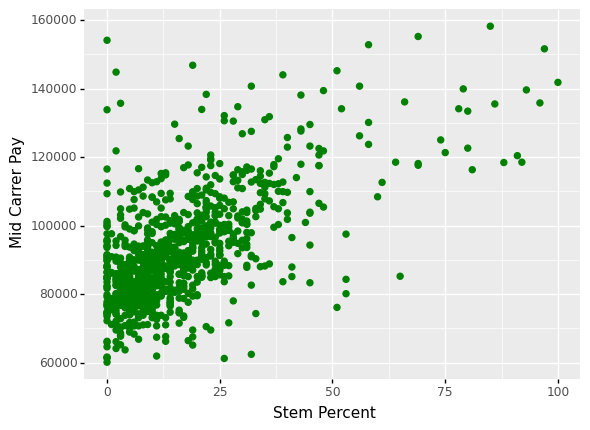

<ggplot: (-9223371844723110436)>

In [4]:
(salary_potential>>
    ggplot(aes(x="stem_percent",y="mid_career_pay"))+
    geom_point(color="green",size=2)
    +labs(x="Stem Percent",y="Mid Carrer Pay"))

### Make World Better Percent x Mid Carrer Pay:

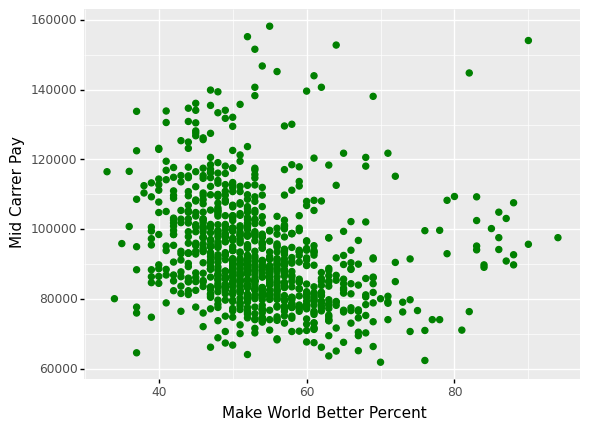

<ggplot: (-9223371844721783876)>

In [5]:
(salary_potential.dropna()>>
    ggplot(aes(x="make_world_better_percent",y="mid_career_pay"))+
    geom_point(color="green",size=2)
    +labs(x="Make World Better Percent",y="Mid Carrer Pay"))

### Custo médio de tuition por nível de renda:

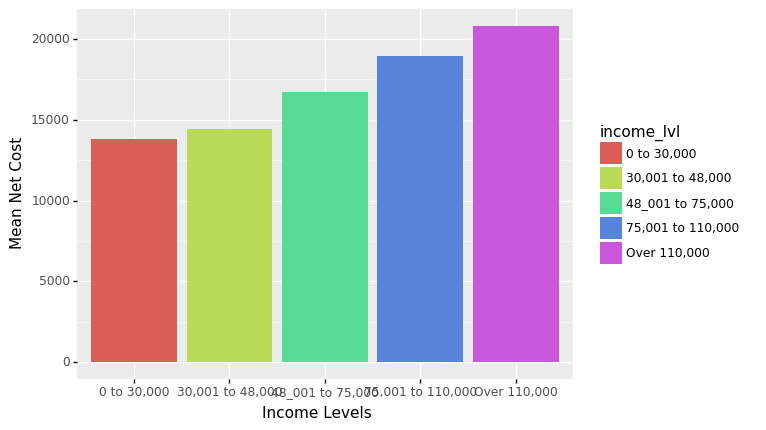

<ggplot: (-9223371844721874724)>

In [6]:
((tuition_income>>
  group_by(_.income_lvl)>>
  summarize(mean_net_cost=_.net_cost.mean())>>
  arrange(-_.mean_net_cost))>>
  ggplot(aes(x="income_lvl",y="mean_net_cost",fill="income_lvl"))+
  labs(x="Income Levels",y="Mean Net Cost",main="Mean Net Cost per Income Level")+
  geom_col(alpha=1))

### Médias salariais por estado:

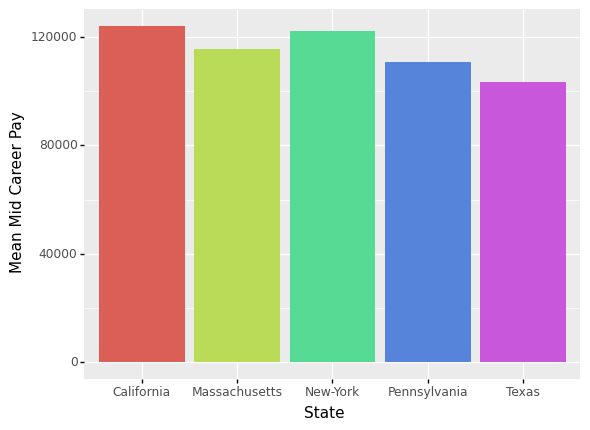

<ggplot: (-9223371844721907252)>

In [7]:
(salary_potential>>
    group_by(_.state_name)>>
    summarize(mean_mid_career_pay=_.mid_career_pay.mean())>>
    arrange(-_.mean_mid_career_pay)>>
    head(5)>>
    ggplot(aes(x="state_name",y="mean_mid_career_pay",fill="state_name"))+
    geom_col(alpha=1,show_legend=False)+
    labs(x="State",y="Mean Mid Career Pay"))

### Média de stem percent por estado:

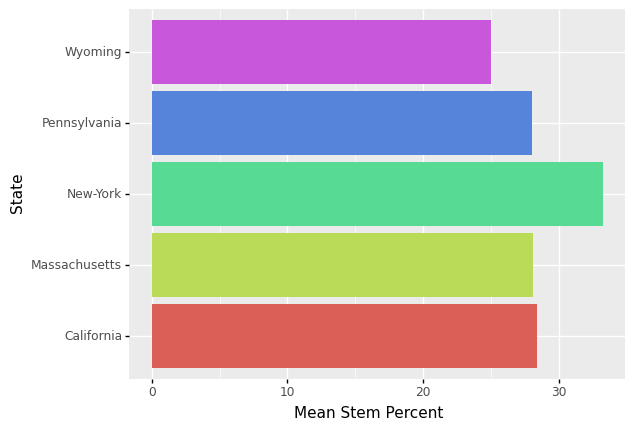

<ggplot: (-9223371844721816744)>

In [8]:
(salary_potential>>
    group_by(_.state_name)>>
    summarize(mean_stem_percent=_.stem_percent.mean())>>
    arrange(-_.mean_stem_percent)>>
    head(5)>>
    ggplot(aes(x="state_name",y="mean_stem_percent",fill="state_name"))+
    geom_col(alpha=1,show_legend=False)+
    labs(x="State",y="Mean Stem Percent")+coord_flip())

### Custo de room and board por estado:

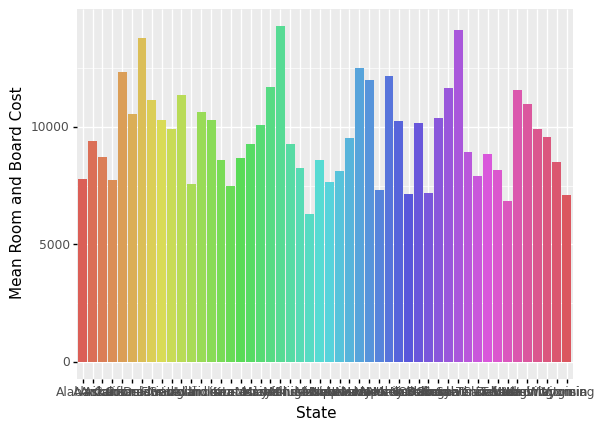

<ggplot: (-9223371844721848628)>

In [10]:
((tuition_cost>>
    group_by(_.state)>>
    summarize(mean_room_and_board=_.room_and_board.mean())>>
    arrange(_.mean_room_and_board))>>
    ggplot(mapping=aes(x="state",y="mean_room_and_board",fill="state"))+
    geom_col(alpha=1,show_legend=False)+
    labs(x="State",y="Mean Room and Board Cost",main=""))